In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import pearsonr


In [2]:
x = np.arange(-50, 51, 1)
noise = np.random.randint(-5, 5, 101)
x.shape, noise.shape

((101,), (101,))

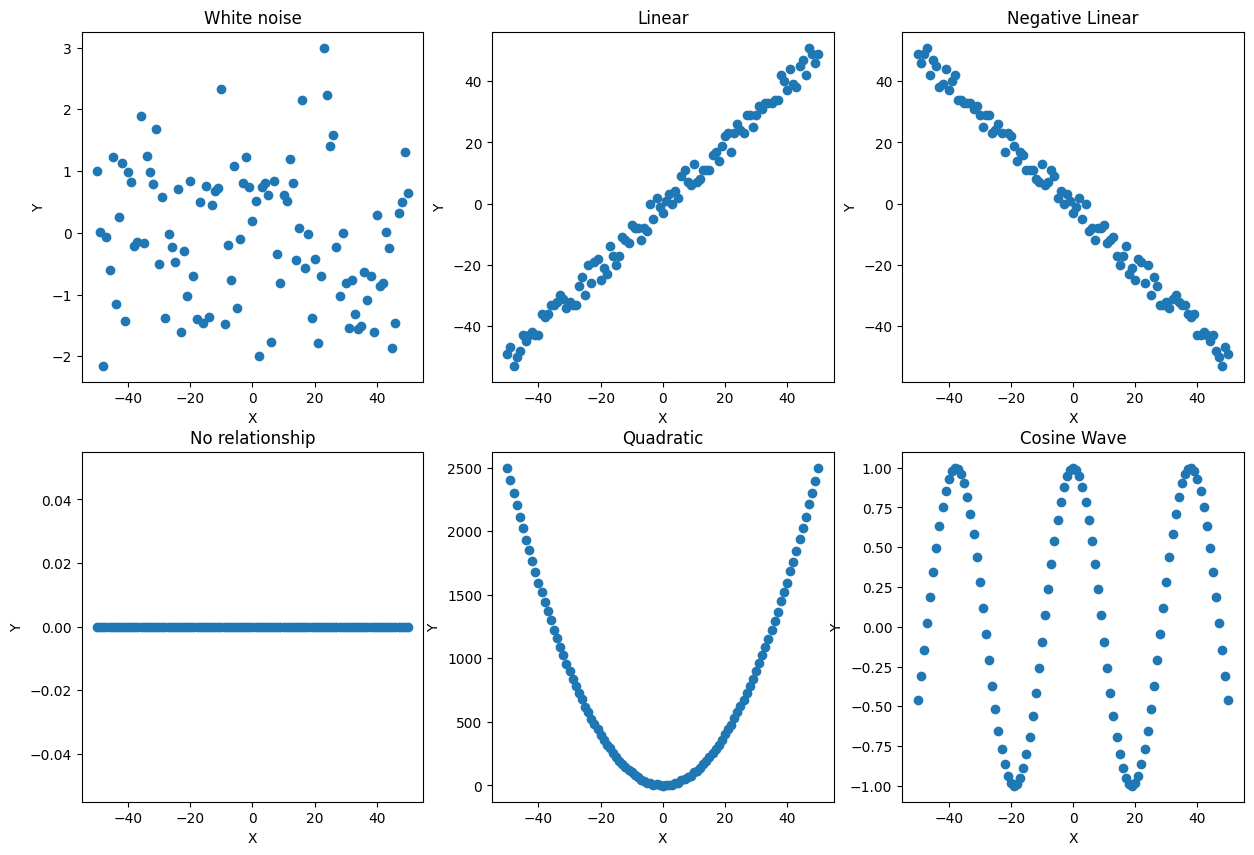

In [3]:
_, ax = plt.subplots(ncols=3, nrows=2, figsize=(15, 10))

white_noise = np.random.randn(101)
ax[0][0].scatter(x, white_noise)
ax[0][0].set_xlabel('X')
ax[0][0].set_ylabel('Y')
ax[0][0].set_title('White noise')

linear = (x + noise).T
ax[0][1].scatter(x, linear)
ax[0][1].set_xlabel('X')
ax[0][1].set_ylabel('Y')
ax[0][1].set_title('Linear')

neg_linear = (np.flip(linear))
ax[0][2].scatter(x, neg_linear)
ax[0][2].set_xlabel('X')
ax[0][2].set_ylabel('Y')
ax[0][2].set_title('Negative Linear')

no_rel = np.zeros(101)
ax[1][0].scatter(x, no_rel)
ax[1][0].set_xlabel('X')
ax[1][0].set_ylabel('Y')
ax[1][0].set_title('No relationship')

quadratic = (x**2 + noise).T
ax[1][1].scatter(x, quadratic)
ax[1][1].set_xlabel('X')
ax[1][1].set_ylabel('Y')
ax[1][1].set_title('Quadratic')

cos_wave = (np.cos(x/6)).T
ax[1][2].scatter(x, cos_wave)
ax[1][2].set_xlabel('X')
ax[1][2].set_ylabel('Y')
ax[1][2].set_title('Cosine Wave')

plt.show()

# Correlation

Correlation measures whether or not two random variables are somehow ralated. 

# 1.) Pearson Correlation Coefficient (PCC or Pearsons'r)

If we speak about correlation, the chances are heigh that implicitaly Persons'r is meant. PCC is one of the most used **linear** correlation measures. Mathematicalli speaking, it is defined as *"the covariance between two cectors, normalized by the product of their standard deviations"*.

The covariance between two vectors is a measure of their tendency to vary above or below their means at the same time. In other words, the covariance measures, whether each pair tend to be on similar or opposite sides of their respective means.

$\Large cov_{x,y}=\frac{\sum_{i=1}^{N}(x_{i}-\bar{x})(y_{i}-\bar{y})}{N-1}$

In [4]:
def covariance(x, y):
    N = len(x)
    return np.sum((x - x.mean()) * (y - y.mean())) / (N-1)

In [5]:
cov_wn = covariance(x, white_noise)
cov_linear = covariance(x, linear)
cov_neg_linear = covariance(x, neg_linear)
cov_no_rel = covariance(x, no_rel)
cov_quadratic = covariance(x, quadratic)
cov_sin = covariance(x, cos_wave)

print(f'Cov of white noise: {cov_wn:.4f}')
print(f'Cov of linear realtionship: {cov_linear:.4f}')
print(f'Cov of negative linear realtionship: {cov_neg_linear:.4f}')
print(f'Cov of no realtionship: {cov_no_rel:.4f}')
print(f'Cov of quadratic relationship: {cov_quadratic:.4f}')
print(f'Cov of sin wave raltionship: {cov_sin:.4f}')

Cov of white noise: -4.3626
Cov of linear realtionship: 855.3800
Cov of negative linear realtionship: -855.3800
Cov of no realtionship: 0.0000
Cov of quadratic relationship: -3.1200
Cov of sin wave raltionship: -0.0000


As we can see from the above examples the covariance of the **(positive and negative) linear** relationship is far from zero and the other examples tend to be close to zero - which indicates no linear relationship. The mathematical explaination is simple:

if the are both above their mean (or both below), then this will produce a positive number because:\
$positive \times positive = positive$\
$negative \times negative = positive$

If the are on different sides of their means, then this produces a negative number because:\
$positive \times negative = negative$

The problem is covariance is scale dependent as we can see in the below example their is a strong linear relationship but the covariance is close to zero because multipling small values result in even smaller values.

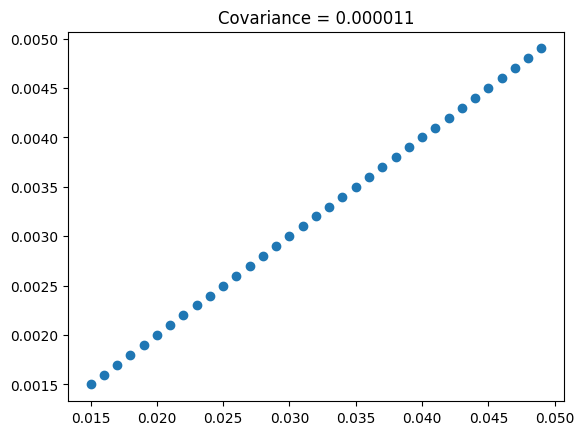

In [6]:
x_small = np.arange(0.015, 0.05, 0.001)
y_small = x_small * 0.1
plt.scatter(x_small, y_small)
plt.title(f'Covariance = {covariance(x_small, y_small):.6f}')
plt.show()

To obtain a more meaningful figure, it is important to *normalize* the covariance. This is done by dividing it by the product of the standard deviations of each of the vectors.

$\Large \rho_{xy}=\frac{Cov(x, y)}{\sigma_{x}\sigma_{y}}$

$\Large r =  \frac{ \sum_{i=1}^{n}(x_{i} - \bar{x})(y_{i} - \bar{y}) }{\sqrt{\sum_{i=1}^{n}(x_{i} - \bar{x})^2 \sum_{i=1}^{n}(y_{i} - \bar{y})^2} }$


In [23]:
def persons_r(x, y):
    cov = np.sum((x - x.mean()) * (y - y.mean()))
    norm = np.sqrt( np.sum( (x - x.mean())**2 ) * np.sum( (y - y.mean())**2) )
    if norm < 1e-10:
        norm = 1e-10
    return cov / norm

In [24]:
cov_wn = persons_r(x, white_noise)
cov_linear = persons_r(x, linear)
cov_neg_linear = persons_r(x, neg_linear)
cov_no_rel = persons_r(x, no_rel)
cov_quadratic = persons_r(x, quadratic)
cov_sin = persons_r(x, cos_wave)

print(f'PCC of white noise: {cov_wn:.4f}')
print(f'PCC of linear realtionship: {cov_linear:.4f}')
print(f'PCC of negative linear realtionship: {cov_neg_linear:.4f}')
print(f'PCC of no realtionship: {cov_no_rel:.4f}')
print(f'PCC of quadratic relationship: {cov_quadratic:.4f}')
print(f'PCC of sin wave raltionship: {cov_sin:.4f}')

PCC of white noise: -0.1353
PCC of linear realtionship: 0.9957
PCC of negative linear realtionship: -0.9957
PCC of no realtionship: 0.0000
PCC of quadratic relationship: -0.0001
PCC of sin wave raltionship: -0.0000


In [71]:
from scipy.stats import pearsonr
from scipy.spatial.distance import correlation, pdist, squareform

In [32]:
print(f"My: {persons_r(x, white_noise)} Scipy:{pearsonr(x, white_noise)[0]}")
print(f"My: {persons_r(x, linear)} Scipy:{pearsonr(x, linear)[0]}")
print(f"My: {persons_r(x, no_rel)} Scipy:{pearsonr(x, no_rel)[0]}")
print(f"My: {persons_r(x, quadratic)} Scipy:{pearsonr(x, quadratic)[0]}")
print(f"My: {persons_r(x, cos_wave)} Scipy:{pearsonr(x, cos_wave)[0]}")

My: -0.1352694856797991 Scipy:-0.13526948567979902
My: 0.9957065967622861 Scipy:0.9957065967622861
My: 0.0 Scipy:nan
My: -0.00013936145913209463 Scipy:-0.00013936145913207715
My: -3.546444303906852e-18 Scipy:5.204170427930421e-18


# 2.) Distance Correlation

Distance correlation bears some resemblance to Pearson’s r, but is actually calculated using a rather different notion of covariance. The method works by replacing our everyday concepts of covariance and standard deviation (as defined above) with “distance” analogues.

Instead of assessing how two variables tend to co-vary in their distance from their respective means, distance correlation assesses **how they tend to co-vary in terms of their distances from all other points**.

In [40]:
print(correlation(x, white_noise))
print(correlation(x, linear))
print(correlation(x, neg_linear))
print(correlation(x, no_rel))
print(correlation(x, quadratic))
print(correlation(x, cos_wave))


1.1352694856797991
0.0042934032377137665
1.995706596762286
nan
1.000139361459132
1.0


In [68]:
from distance_correlation import dcor, dcov, dvar

In [56]:
print(f"Dcor white noise: {dcor(x.reshape(-1,1), white_noise.reshape(-1,1))}")
print(f"Dcor linear:\t  {dcor(x.reshape(-1,1), linear.reshape(-1,1))}")
print(f"Dcor neg. linear: {dcor(x.reshape(-1,1), neg_linear.reshape(-1,1))}")
print(f"Dcor no relation: {dcor(x.reshape(-1,1), no_rel.reshape(-1,1))}")
print(f"Dcor quadratic:\t  {dcor(x.reshape(-1,1), quadratic.reshape(-1,1))}")
print(f"Dcor cos wave:\t  {dcor(x.reshape(-1,1), cos_wave.reshape(-1,1))}")

Dcor white noise: 0.21708046071984924
Dcor linear:	  0.9947721329410161
Dcor neg. linear: 0.9947721329410161
Dcor no relation: 0.0
Dcor quadratic:	  0.4915868567673011
Dcor cos wave:	  0.21924833176653066


In [67]:
def cent_dist(X):
    """Computes the pairwise euclidean distance between rows of X and centers
     each cell of the distance matrix with row mean, column mean, and grand mean.
    """
    X = X.reshape(-1, 1)
    M = squareform(pdist(X))    # distance matrix
    rmean = M.mean(axis=1)
    cmean = M.mean(axis=0)
    gmean = rmean.mean()
    R = np.tile(rmean, (M.shape[0], 1)).transpose()
    C = np.tile(cmean, (M.shape[1], 1))
    G = np.tile(gmean, M.shape)
    CM = M - R - C + G
    return CM

In [81]:
a = np.array([[1],[2],[10]])
squareform(pdist(a))

array([[0., 1., 9.],
       [1., 0., 8.],
       [9., 8., 0.]])

In [78]:
np.array([[1],[2],[3]]), np.array([1,2,3]).reshape(-1, 1)

(array([[1],
        [2],
        [3]]),
 array([[1],
        [2],
        [3]]))